# This Notebook Explores Computer Vision Using MNIST Dataset.

In [2]:
# Required libraries are loaded. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
import cv2

In [3]:
# Files to be used.
path = "../../../Data/digit-recognizer/"
train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


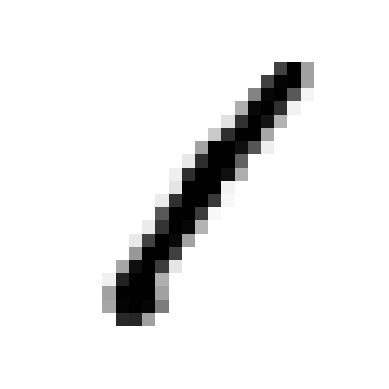

In [6]:
# Here we are visualizing a sample observation.
obs = train.iloc[0,][1:].to_numpy()
im = obs.reshape(28, 28)
plt.imshow(im, cmap="binary")
plt.axis("off")
plt.show()

In [7]:
# Working with numpy is easier on sklearn.
X_train = train.loc[:,"pixel0":].to_numpy()
y_train = train.loc[:,"label"].to_numpy()
test = test.to_numpy()

### Grid Search KNeighbors for best parameter space.

In [9]:
knn_clf = KNeighborsClassifier()

In [10]:
# Parameters to search for the best model.
params = [{"n_neighbors": [2, 3, 4, 6], "weights": ["distance", "uniform"]}]

In [11]:
grid_search = GridSearchCV(knn_clf, params, cv=5, scoring="accuracy", verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ...n_neighbors=2, weights=distance;, score=0.966 total time=   8.9s
[CV 2/5] END ...n_neighbors=2, weights=distance;, score=0.968 total time=   8.9s
[CV 3/5] END ...n_neighbors=2, weights=distance;, score=0.963 total time=   9.8s
[CV 4/5] END ...n_neighbors=2, weights=distance;, score=0.967 total time=   9.1s
[CV 5/5] END ...n_neighbors=2, weights=distance;, score=0.967 total time=  10.1s
[CV 1/5] END ....n_neighbors=2, weights=uniform;, score=0.960 total time=  10.2s
[CV 2/5] END ....n_neighbors=2, weights=uniform;, score=0.959 total time=  11.2s
[CV 3/5] END ....n_neighbors=2, weights=uniform;, score=0.958 total time=  12.5s
[CV 4/5] END ....n_neighbors=2, weights=uniform;, score=0.960 total time=  12.6s
[CV 5/5] END ....n_neighbors=2, weights=uniform;, score=0.962 total time=  11.4s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  10.6s
[CV 2/5] END ...n_neighbors=3, weights=distance;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [2, 3, 4, 6],
                          'weights': ['distance', 'uniform']}],
             scoring='accuracy', verbose=3)

In [12]:
cvres = grid_search.cv_results_

for mean_test_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(f"The mean_test_score is: {mean_test_score} and params: {params}")

The mean_test_score is: 0.9662380952380953 and params: {'n_neighbors': 2, 'weights': 'distance'}
The mean_test_score is: 0.9599523809523809 and params: {'n_neighbors': 2, 'weights': 'uniform'}
The mean_test_score is: 0.9678095238095239 and params: {'n_neighbors': 3, 'weights': 'distance'}
The mean_test_score is: 0.9666904761904762 and params: {'n_neighbors': 3, 'weights': 'uniform'}
The mean_test_score is: 0.9691428571428571 and params: {'n_neighbors': 4, 'weights': 'distance'}
The mean_test_score is: 0.9651190476190477 and params: {'n_neighbors': 4, 'weights': 'uniform'}
The mean_test_score is: 0.9677857142857142 and params: {'n_neighbors': 6, 'weights': 'distance'}
The mean_test_score is: 0.9650714285714287 and params: {'n_neighbors': 6, 'weights': 'uniform'}


### Error Analysis

In [14]:
y_train_pred = cross_val_predict(grid_search.best_estimator_, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[4104,    0,    5,    0,    0,    6,   11,    3,    2,    1],
       [   0, 4653,    9,    2,    4,    1,    4,    7,    2,    2],
       [  26,   36, 4003,   15,    4,    3,    3,   74,    9,    4],
       [   3,   10,   27, 4188,    0,   50,    3,   23,   26,   21],
       [   2,   44,    0,    0, 3905,    0,   15,    8,    0,   98],
       [   8,    3,    2,   55,    2, 3642,   47,    4,    5,   27],
       [  21,    6,    0,    0,    6,   17, 4085,    0,    2,    0],
       [   1,   54,    9,    2,    9,    0,    0, 4271,    0,   55],
       [  11,   43,   13,   54,   15,   65,   19,   12, 3788,   43],
       [  13,   10,    3,   26,   43,   12,    2,   61,   11, 4007]],
      dtype=int64)

Let's visualize the above matrix

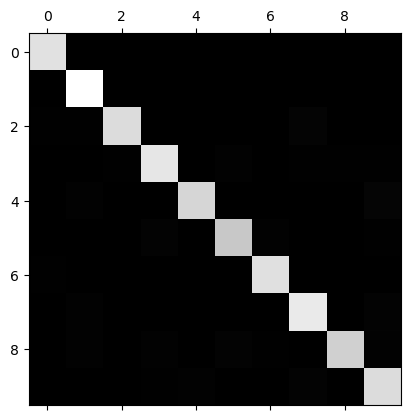

In [16]:
plt.matshow(conf_mx, cmap="gray")
plt.show()

The image shows that the classifier did a good job classifying the digits. However, let's focus on the errors.

In [18]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx/row_sums
norm_conf_mx

array([[9.93223621e-01, 0.00000000e+00, 1.21006776e-03, 0.00000000e+00,
        0.00000000e+00, 1.45208132e-03, 2.66214908e-03, 7.26040658e-04,
        4.84027106e-04, 2.42013553e-04],
       [0.00000000e+00, 9.93381725e-01, 1.92143467e-03, 4.26985482e-04,
        8.53970965e-04, 2.13492741e-04, 8.53970965e-04, 1.49444919e-03,
        4.26985482e-04, 4.26985482e-04],
       [6.22456308e-03, 8.61862581e-03, 9.58343309e-01, 3.59109409e-03,
        9.57625090e-04, 7.18218817e-04, 7.18218817e-04, 1.77160642e-02,
        2.15465645e-03, 9.57625090e-04],
       [6.89496667e-04, 2.29832222e-03, 6.20547001e-03, 9.62537348e-01,
        0.00000000e+00, 1.14916111e-02, 6.89496667e-04, 5.28614112e-03,
        5.97563778e-03, 4.82647667e-03],
       [4.91159136e-04, 1.08055010e-02, 0.00000000e+00, 0.00000000e+00,
        9.58988212e-01, 0.00000000e+00, 3.68369352e-03, 1.96463654e-03,
        0.00000000e+00, 2.40667976e-02],
       [2.10803689e-03, 7.90513834e-04, 5.27009223e-04, 1.44927536e-02,
   

In [19]:
np.fill_diagonal(norm_conf_mx, 0) # This elliminates correctly classified digits

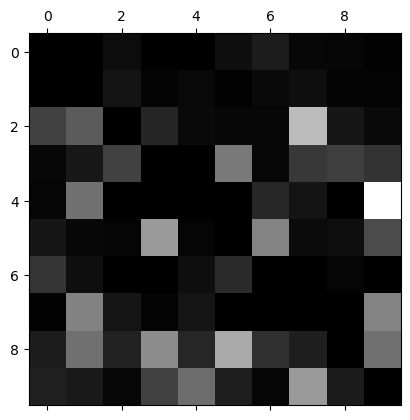

In [20]:
plt.matshow(norm_conf_mx, cmap="gray")
plt.show()

### Data Augmentation

In [22]:
from scipy.ndimage import shift

In [23]:
def shift_image(image, dx, dy):
    """
    This function is used to shift an image down, up, left and right.
    """
    
    image = image.reshape(28, 28)
    shifted_image = shift(image, [dx, dy], cval=0)
    shifted_image = shifted_image.reshape([-1])
    return shifted_image

In [24]:
def augment_data(predictors, labels):
    """
    This function augments both the predictors and labels.
    """
    augmented_predictors = [image for image in predictors]
    augmented_labels = [label for label in labels]
    
    rotations = [(1,0),(-1,0),(0,-1),(0,1)]
    for dx, dy in rotations:
        for image, label in zip(predictors, labels):
            shifted_image = shift_image(image, dx, dy)
            augmented_predictors.append(shifted_image)
            augmented_labels.append(label)
    augmented_predictors = np.array(augmented_predictors)
    augmented_labels = np.array(augmented_labels)
    return augmented_predictors, augmented_labels
X_train_augmented, y_train_augmented = augment_data(X_train, y_train)

In [25]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

### Additional Preprocessing

In [35]:
def highlight_closed_loops(image):
    # Reshape to 28 x 28 pixel image
    image = image.reshape(28, 28)
    # (Example: Thresholding to highlight closed loops)
    image_uint8 = image.astype(np.uint8)
    _, thresholded = cv2.threshold(image_uint8, 128, 255, cv2.THRESH_BINARY_INV)

    # Apply morphological operations (optional)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    processed_image = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)
    
    return processed_image.reshape([-1])

In [37]:
X_train_augmented_cv = []
test_cv = []

for image in X_train_augmented:
    processed_image = highlight_closed_loops(image)
    X_train_augmented_cv.append(processed_image)
    
for image in test:
    processed_image = highlight_closed_loops(image)
    test_cv.append(processed_image)
    
X_train_augmented_cv = np.array(X_train_augmented_cv)
test_cv = np.array(test_cv)

In [39]:
# Standardize the training set.
scaler = StandardScaler()
X_train_augmented_scaled = scaler.fit_transform(X_train_augmented_cv)
test_scaled = scaler.fit_transform(test_cv)

### Train KNeighbors on best parameters and augmented data.

In [49]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [51]:
knn_clf.fit(X_train_augmented_cv, y_train_augmented)
predictions = knn_clf.predict(test_cv)

In [52]:
#scores = cross_val_score(knn_clf, X_train_augmented_scaled, y_train_augmented, cv=5)
#print(np.mean(scores))

In [53]:
df = pd.DataFrame()
df["ImageId"] = np.arange(1, 28001)
df["Label"] = predictions
df.to_csv("kneighbors_predictions.csv", index=False)

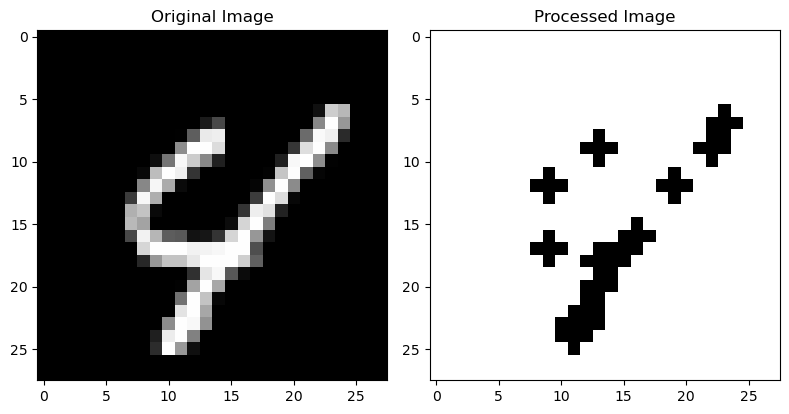

In [60]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(X_train_augmented[15].reshape(28,28), cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Processed Image")
plt.imshow(X_train_augmented_cv[15].reshape(28,28), cmap='gray')
plt.tight_layout()
plt.show()